In [1]:
import torch
from dpm.models import MultinomialNaiveBayes
from dpm.distributions import Categorical, Distribution
from dpm.visualize import plot_stats
import numpy as np

In [2]:
n_classes, n_features, n_states = (4, 3, 5)

In [3]:
model = MultinomialNaiveBayes(n_classes=n_classes, n_features=n_features, n_states=n_states)

In [21]:
model.y_dist.probs.shape, model.x_dist[0].probs.shape

(torch.Size([4]), torch.Size([3, 5]))

In [5]:
model.sample(3)

tensor([[0., 4., 2.],
        [2., 4., 2.],
        [3., 1., 3.]])

In [6]:
y = torch.cat([i*torch.ones(1000) for i in range(n_classes)]).view(-1, 1).float()
y.shape

torch.Size([4000, 1])

In [7]:
ps = [0.05, 0.27, 0.65, 0.85]
x = torch.cat([torch.tensor(np.random.binomial(size=(1000, n_features), n=n_states-1, p=ps[i]))
               for i in range(n_classes)], dim=0).float()
x.shape

torch.Size([4000, 3])

In [8]:
stats = model.fit(x, y)

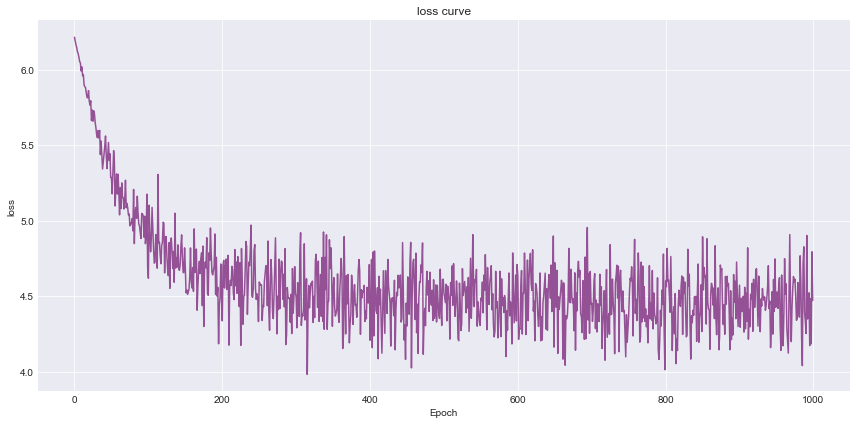

In [9]:
plot_stats(stats)

In [10]:
print(model.y_dist.probs) 
for i in range(n_classes):
    print(model.x_dist[i].probs)

tensor([0.2534, 0.2396, 0.2554, 0.2516], grad_fn=<SoftmaxBackward>)
tensor([[0.8061, 0.1756, 0.0088, 0.0047, 0.0047],
        [0.8144, 0.1573, 0.0175, 0.0058, 0.0051],
        [0.8228, 0.1490, 0.0184, 0.0050, 0.0050]], grad_fn=<SoftmaxBackward>)
tensor([[0.3162, 0.3927, 0.2192, 0.0623, 0.0095],
        [0.2669, 0.4286, 0.2456, 0.0456, 0.0134],
        [0.3024, 0.4149, 0.2306, 0.0454, 0.0068]], grad_fn=<SoftmaxBackward>)
tensor([[0.0173, 0.1114, 0.3163, 0.3950, 0.1600],
        [0.0127, 0.1111, 0.3051, 0.4119, 0.1591],
        [0.0165, 0.1144, 0.2806, 0.4269, 0.1617]], grad_fn=<SoftmaxBackward>)
tensor([[0.0060, 0.0088, 0.1108, 0.3547, 0.5197],
        [0.0051, 0.0112, 0.0762, 0.3557, 0.5518],
        [0.0051, 0.0117, 0.0884, 0.3674, 0.5273]], grad_fn=<SoftmaxBackward>)


In [11]:
(model.predict(x) == y.long()).float().mean()

tensor(0.8098)

In [25]:
model.predict(model.sample(5))

tensor([[1],
        [0],
        [2],
        [1],
        [0]])